In [118]:
import pandas as pd
import numpy as np
import math
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_regression
from sklearn.compose import ColumnTransformer

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (14,14)

IN_COLAB = 'google.colab' in str(get_ipython())
if IN_COLAB:
    !wget https://raw.githubusercontent.com/AkeemSemper/Intro_to_Machine_Learning_Student_Workbooks/main/data/HousingData.csv
    !wget https://raw.githubusercontent.com/AkeemSemper/Intro_to_Machine_Learning_Student_Workbooks/main/data/bodyfat.csv
    !wget https://github.com/AkeemSemper/Intro_to_Machine_Learning_Student_Workbooks/raw/main/stats_workbooks/data/NBA.csv
    df = pd.read_csv("HousingData.csv")
    df_ = pd.read_csv("bodyfat.csv")
    df_nba = pd.read_csv("NBA.csv")
else:
    df = pd.read_csv("../data/HousingData.csv")
    df_ = pd.read_csv("../data/bodyfat.csv")
    df_nba = pd.read_csv("../data/NBA.csv")

df.rename(columns={'MEDV': 'target'}, inplace=True)
df_.rename(columns={"BodyFat":"target"}, inplace=True)
df_nba.drop(columns=["FGM", "FGA", "3PM", "3PA", "FTM", "FTA"], inplace=True)
df = df.dropna()
df_ = df_.dropna()

# Regression Trees

Trees can also perform regressions in addition to decisions. Using the regression tree models is pretty straightforward and very similar to any other model like linear regression. The regression tree itself is mostly similar to the decision tree, the primary difference is that both the outcomes and the error metrics are adapted to numerical values. 

<b>A Regression Tree:</b>

![Regression Tree](images/regression_tree.webp "Regression Tree" )

We can start by creating and looking at a regression tree, as always, the mechanics of making and training the model is the same as we are used to. 

### Regression Tree Differences

A regression tree functions in almost the exact same way as a classification tree, with the primary difference being that the outcome is a continuous value rather than a categorical one. The tree is built in the same way, with the same splitting criteria, but the leaf nodes will contain a value rather than a class. The key differences are:
<ul>
    <li> The splitting criterion is based on the reduction in variance (MSE) rather than the Gini index or entropy. </li>
    <li> The leaf nodes contain a value, the mean of the records in that node, rather than a class label. </li>
</ul>

So, a regression tree is built to split the data in whatever way will leave the resulting nodes the most similar, in terms of their target variable. The average of whichever records are in a leaf node become the prediction for that node.

In [119]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [120]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

18
0.6853569687184653
(394, 13) (394, 1)


[Text(0.702500414090106, 0.9736842105263158, 'x[5] <= 6.838\nsquared_error = 81.308\nsamples = 295\nvalue = 22.213'),
 Text(0.4606545384275618, 0.9210526315789473, 'x[12] <= 15.0\nsquared_error = 38.793\nsamples = 251\nvalue = 19.613'),
 Text(0.2795660335689046, 0.868421052631579, 'x[7] <= 1.391\nsquared_error = 23.753\nsamples = 154\nvalue = 22.953'),
 Text(0.276032464664311, 0.8157894736842105, 'squared_error = 0.0\nsamples = 2\nvalue = 50.0'),
 Text(0.28309960247349825, 0.8157894736842105, 'x[5] <= 6.543\nsquared_error = 14.314\nsamples = 152\nvalue = 22.597'),
 Text(0.10683524734982332, 0.7631578947368421, 'x[12] <= 7.9\nsquared_error = 9.355\nsamples = 122\nvalue = 21.534'),
 Text(0.03025618374558304, 0.7105263157894737, 'x[9] <= 222.5\nsquared_error = 3.567\nsamples = 31\nvalue = 24.052'),
 Text(0.0267226148409894, 0.6578947368421053, 'squared_error = 0.0\nsamples = 1\nvalue = 28.7'),
 Text(0.033789752650176676, 0.6578947368421053, 'x[7] <= 4.319\nsquared_error = 2.942\nsamples =

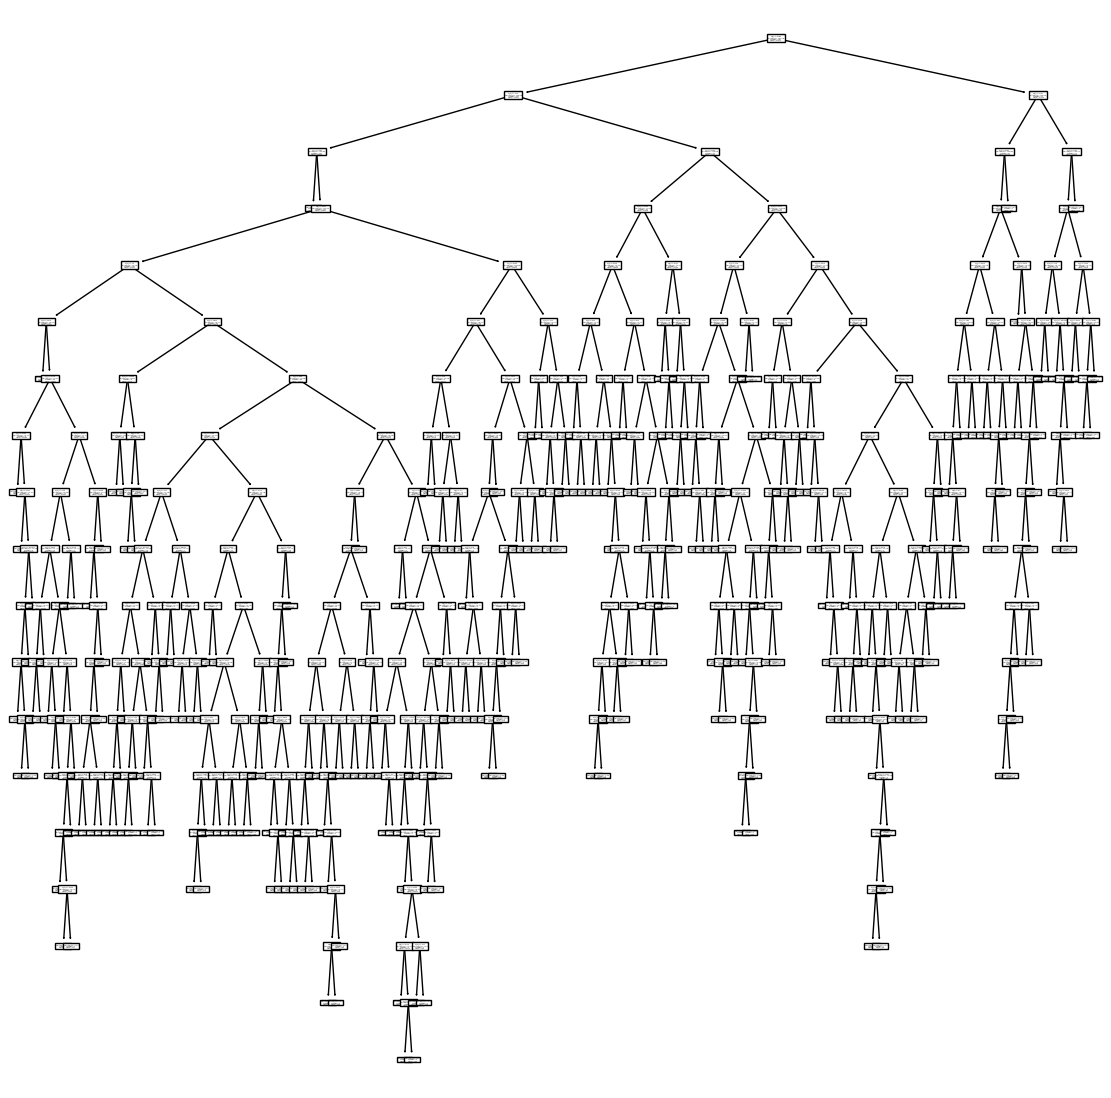

In [121]:
#Generate Model
df2 = pd.get_dummies(df, drop_first=True)
y = np.array(df2["target"]).reshape(-1,1)
X = np.array(df2.drop(columns={"target"}))

X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
print(clf.get_depth())
print(clf.score(X_test, y_test))
print(X.shape, y.shape)
plot_tree(clf)

## Regression Tree Decision Making

The regression tree works very similarly to the decision tree. The key differences are:
<ul>
<li> <b>Predictions:</b> Instead of producing a classification at the end, it produces an average of all the values in that group. That average is the prediction for anything that falls into that leaf on the tree. 
<li> <b>Split Decisions: </b>Instead of using the information gain concept that decision trees do, a regression tree tries to minimize error when splitting, normally MSE. So the algorithm seeks splits that have the lowest average error between the error and the values.
    <ul>
    <li> As a note, this should be familiar from the idea of a cost function. We want the model to minimize the error, how we define error can change, but the process of finding the optimal choice is the same. 
    <li> Rather than measures of set purity, like gini or entropy, the model uses the error as the metric to measure which split generates the "best" fitting tree. 
    </ul>
</ul>

Just like decision trees, there are a few options that we can set as HP - one of those being the error metric. We can choose absolute error or a couple of others for the error metric; we can also set limits to growth like depth and min_split_size. 

The more we allow the tree to expand, the more potential predictions we can make, but the more likely we are to overfit. Limiting the tree size means each terminal leaf will represent more records with its prediction, and the tree will be less likely to overfit.

#### Regression Tree Limitations

One specific weakness with regression trees is that they don't "extend" like a linear regression, they're bounded by whatever data they have. So if the maximum prediction that is generated in training is 50, no matter what future inputs look like it will never be able to predict beyond that. We can see this if we chart an example, there isn't a nice smooth prediction curve like a linear regression, we get blocky steps.

![Regression Tree](images/regtree2.png "Regression Tree" )

### Use a Grid Search to Improve

We can also utilize a grid search to do some HP tuning. Along with some other options we can try different error metrics. We can set a list for any of the hyperparameters that we want to use in the grid search, and every combination will be executed and evaluated. 

Note that the names for absolute and squared error are changing, so depending on the specific version of sklearn you have installed you might need to use absolute_error/squared_error or mae/mse, the meaning is the same, they just changed the label to be more descriptive. 

In [122]:
tree_para = {'min_samples_split':[3,4,5,6,7,8,9,10],
            'max_depth':[7,8,9,10,11,12], 
            'criterion':["friedman_mse", "poisson", "squared_error", "absolute_error"]}

clfCV = GridSearchCV(estimator=DecisionTreeRegressor(random_state=0), param_grid=tree_para, cv=5) #See below for the CV argument
clfCV.fit(X_train, y_train)
clfCV.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=9,
                      min_samples_split=10, random_state=0)

Use the optimal combo from above as a model. 

0.6938758056466057


[Text(0.5491071428571429, 0.95, 'x[12] <= 14.4\nabsolute_error = 6.395\nsamples = 295\nvalue = 21.1'),
 Text(0.32142857142857145, 0.85, 'x[5] <= 6.803\nabsolute_error = 5.71\nsamples = 187\nvalue = 23.7'),
 Text(0.15178571428571427, 0.75, 'x[12] <= 7.9\nabsolute_error = 3.073\nsamples = 142\nvalue = 22.4'),
 Text(0.05357142857142857, 0.65, 'x[12] <= 4.52\nabsolute_error = 2.181\nsamples = 52\nvalue = 24.55'),
 Text(0.03571428571428571, 0.55, 'absolute_error = 1.86\nsamples = 5\nvalue = 30.1'),
 Text(0.07142857142857142, 0.55, 'x[5] <= 6.379\nabsolute_error = 1.879\nsamples = 47\nvalue = 24.3'),
 Text(0.03571428571428571, 0.45, 'x[5] <= 4.748\nabsolute_error = 1.224\nsamples = 17\nvalue = 23.1'),
 Text(0.017857142857142856, 0.35, 'absolute_error = 0.0\nsamples = 1\nvalue = 27.5'),
 Text(0.05357142857142857, 0.35, 'x[0] <= 0.037\nabsolute_error = 1.025\nsamples = 16\nvalue = 23.1'),
 Text(0.03571428571428571, 0.25, 'absolute_error = 0.55\nsamples = 4\nvalue = 24.45'),
 Text(0.07142857142

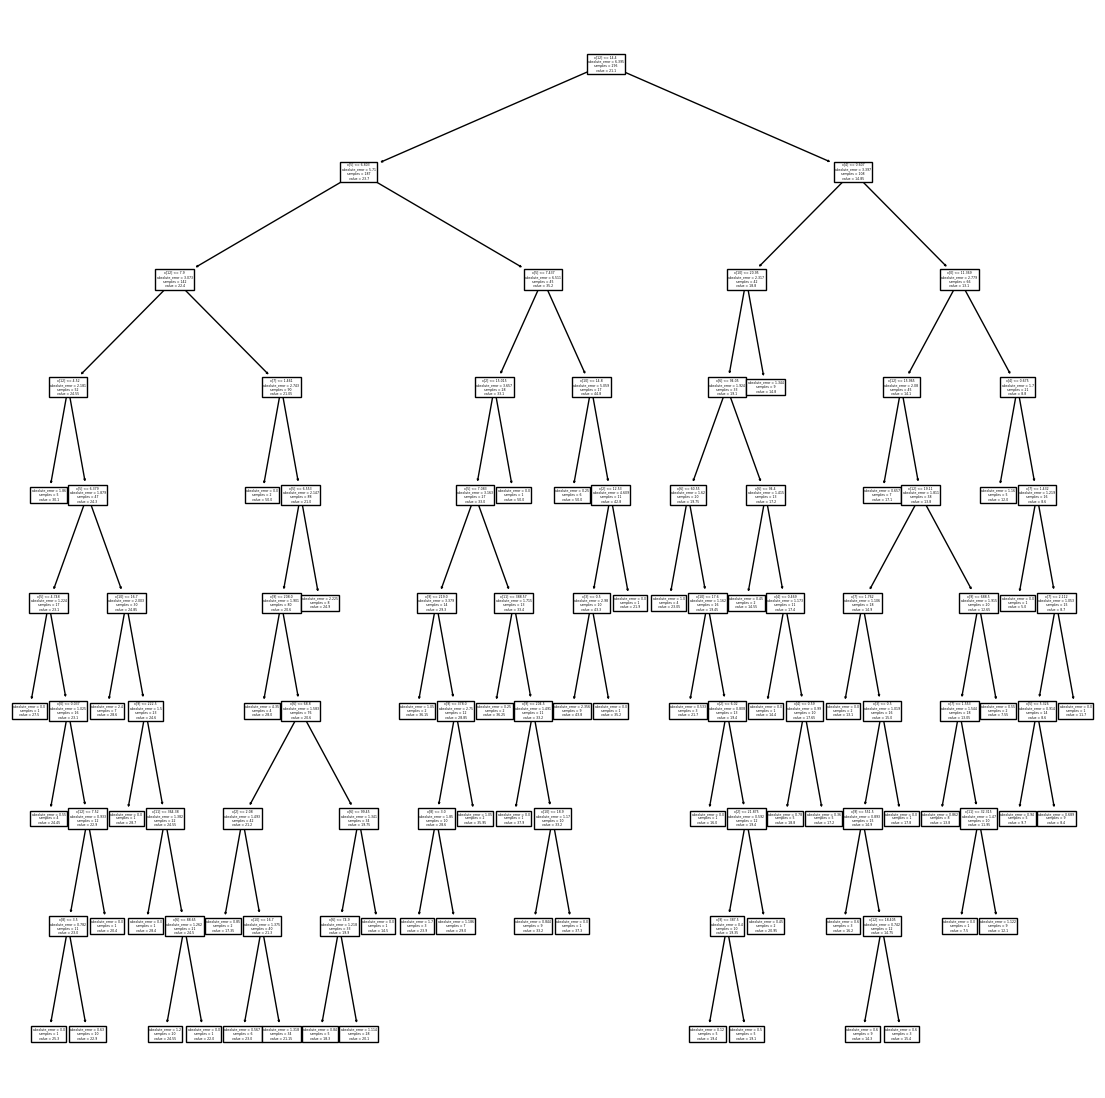

In [123]:
clf2 = clfCV.best_estimator_
clf2 = clf2.fit(X_train, y_train)
print(clf2.score(X_test, y_test))
plot_tree(clf2)

### Regression Predictions

We can look at the predictions made by the tree (limit the tree size to make the chart above and the results obvious). Predictions are only at the results of one of the terminal leafs, we don't get a curve like a linear regression. 

This is a reason that regression trees aren't normally all that common, the number of distinct values that can be predicted is limited by the number of leafs in the tree. If we count the number of distinct predictions made and compare it to the number of total predictions made, we can see how we have a very small number of distinct values being predicted. 

<b>A regression tree will only generate predictions at the terminal leafs, and the number of distinct predictions is limited by the number of terminal leafs. It is not like a linear regression, where the model provides us with a continuous set of predictions. The regression tree will only predict the average of the values in the terminal leaf.</b>

Number of predictions made: 99
Unique predictions: 32


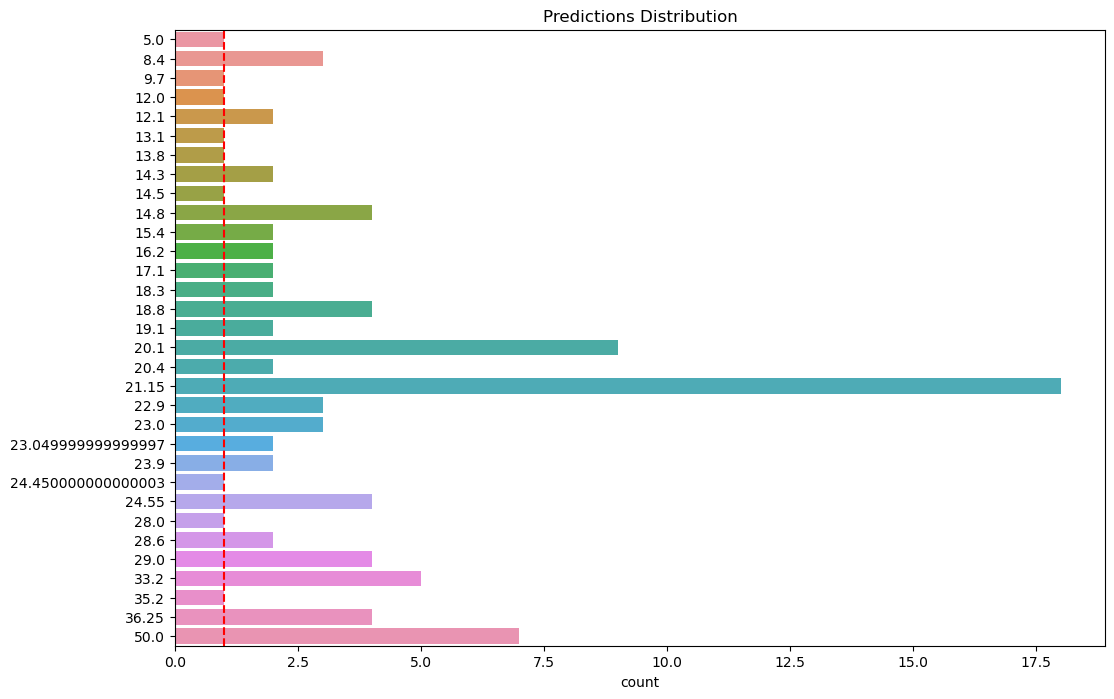

In [141]:
plt.figure(figsize=(12,8))
preds = clf2.predict(X_test)
#sns.histplot(preds, binwidth=1, kde=True)
sns.countplot(y=preds)
plt.title("Predictions Distribution")
plt.axvline(1, color='red', linestyle='--')
print("Number of predictions made:", len(X_test))
print("Unique predictions:", len(np.unique(preds)))

## Bias and Variance

Regression trees can help illustrate another, slightly more theoretical view on the idea of fitting a model, bias and variance. Bias and variance are two different types of error that can occur when fitting a model, originating from different types of mistakes. To make sense of it, we can think of breaking the errors that a predictive model makes into a few different categories:
<ul>
<li> Irriducible Error: This is the error that is inherent in the data or scenario itself - no matter how good the model is. Think of it as the randomness that occurs in reality - even if we have the best predcitive model possible, we can't predict the future perfectly. </li>
<li> Bias: This is the error that occurs because the model is too simple. It doesn't have enough complexity to capture the underlying structure of the data. </li>
<li> Variance: This is the error that occurs because the model is too complex. It has too much complexity and is fitting to the noise in the data rather than the underlying structure. </li>
</ul>

The idea is that we want to find a balance between bias and variance. If we have a model that is too simple, it will have high bias and low variance. If we have a model that is too complex, it will have low bias and high variance. We want to find the sweet spot in the middle where we have the lowest total error. This balancing act is called the <b>Bias-Variance Tradeoff</b>, a fundamental concept in machine learning.

### Trees and the Tradeoff

Trees are a good example of this tradeoff. If we have a tree that is too small, it will have high bias and low variance. It won't be able to capture the underlying structure of the data. If we have a tree that is too large, it will have low bias and high variance. It will be fitting to the noise in the data rather than the underlying structure, which is the default behavior of a tree without constraints on its growth.

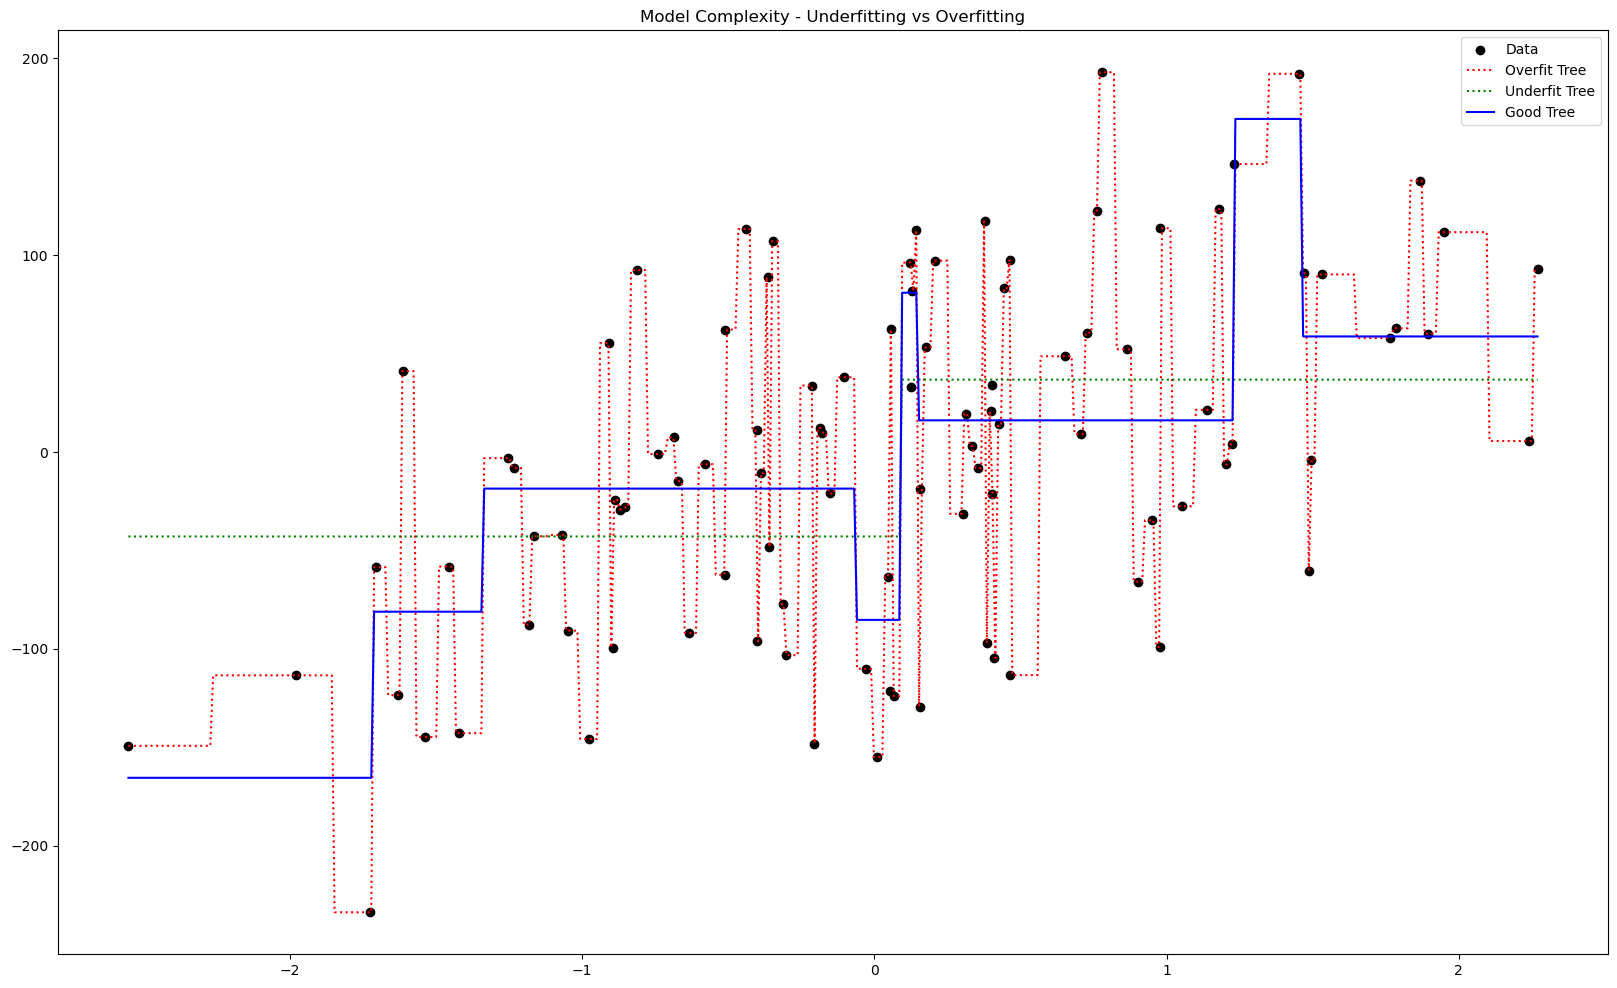

In [147]:
# Generate a regression dataset with 1 feature
from sklearn.datasets import make_swiss_roll
X_fit, y_fit = make_regression(n_samples=100, n_features=1, noise=70, random_state=0)

# Create an overfitting tree
tree_overfit = DecisionTreeRegressor()
tree_overfit.fit(X_fit, y_fit)

# Create an underfitting tree
tree_underfit = DecisionTreeRegressor(max_depth=1)
tree_underfit.fit(X_fit, y_fit)

# Good Tree
tree_good = DecisionTreeRegressor(max_depth=3)
tree_good.fit(X_fit, y_fit)

# Generate test data for plotting
X_test_fit = np.linspace(X_fit.min(), X_fit.max(), 500).reshape(-1, 1)

# Predict using the models
y_overfit = tree_overfit.predict(X_test_fit)
y_underfit = tree_underfit.predict(X_test_fit)
y_good = tree_good.predict(X_test_fit)

# Plot the data
plt.figure(figsize=(20, 12))
plt.scatter(X_fit, y_fit, color='black', label='Data')
plt.plot(X_test_fit, y_overfit, color='r', label='Overfit Tree', linestyle='dotted')
plt.plot(X_test_fit, y_underfit, color='green', label='Underfit Tree', linestyle='dotted')
plt.plot(X_test_fit, y_good, color='blue', label='Good Tree')
plt.title("Model Complexity - Underfitting vs Overfitting")
plt.legend()
plt.show()

## Exercise - Predict the Target (BodyFat)

Predict the target variable (BodyFat) using a regression tree. Optionally use a grid search to find the best hyperparameters.

In [126]:
#Load data
df_.head()

,Density,target,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [127]:
y_ = np.array(df_["target"]).reshape(-1,1)
X_ = np.array(df_.drop(columns={"target"}))
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_)

scaler_ = MinMaxScaler()
estimator_ = DecisionTreeRegressor()
pipe_ = Pipeline(steps=[("scaler", scaler_), ("forest", estimator_)])

params_ = {'forest__max_depth':[5,6,7,8,9], 
            "forest__max_features":[7,8,9,10,11,12,13,14]}
 
clf_ = GridSearchCV(pipe_, param_grid=params_, cv=5, n_jobs=-1) 
clf_.fit(X_train_, y_train_.ravel())
best_ = clf_.best_estimator_
print(best_.score(X_test_, y_test_))
print(best_)

0.9181812222135
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('forest',
                 DecisionTreeRegressor(max_depth=5, max_features=11))])


## Exercise #2 - Predict the Points Per Game

Predict the target - the number of points per game. Note that the target will need to be constructed from the total points and the number of games played. Some steps that you'll need to do are:
<ul>
<li> Create the target variable by dividing the total points by the number of games played. </li>
<li> Drop the total points from the data used to train the model. If we don't do this, the model will be able to predict the points per game really (really) well, but we want something that can take in what we can know and predict what we want. </li>
</ul>

In [128]:
df_nba.head()

,Name,Games Played,MIN,PTS,FG%,3P%,FT%,OREB,DREB,REB,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,37.2,26.3,66.7,6,26,32,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,42.1,38.7,83.3,32,134,166,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,44.7,27.1,72.1,46,123,169,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,41.4,11.1,65.2,48,114,162,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,53.8,30.6,75.9,131,413,544,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


In [129]:
df_nba.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,490,490,AJ Price,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Games Played,490.0,NaN,NaN,NaN,53.014286,24.175437,1.0,33.0,61.0,74.0,83.0
MIN,490.0,NaN,NaN,NaN,1214.714286,820.570132,3.0,492.25,1193.0,1905.75,2981.0
PTS,490.0,NaN,NaN,NaN,502.108163,422.084232,0.0,145.25,423.0,774.0,2217.0
FG%,490.0,NaN,NaN,NaN,43.099184,9.625231,0.0,39.6,42.9,47.575,100.0
3P%,490.0,NaN,NaN,NaN,25.519184,15.796603,0.0,15.5,31.3,36.4,100.0
FT%,490.0,NaN,NaN,NaN,70.450408,19.087819,0.0,64.35,75.0,82.0,100.0
OREB,490.0,NaN,NaN,NaN,54.655102,61.066036,0.0,13.0,31.5,75.75,437.0
DREB,490.0,NaN,NaN,NaN,162.697959,137.786528,0.0,50.75,139.0,228.75,829.0
REB,490.0,NaN,NaN,NaN,217.353061,191.983916,0.0,70.25,176.0,314.75,1226.0


In [130]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          490 non-null    object 
 1   Games Played  490 non-null    int64  
 2   MIN           490 non-null    int64  
 3   PTS           490 non-null    int64  
 4   FG%           490 non-null    float64
 5   3P%           490 non-null    float64
 6   FT%           490 non-null    float64
 7   OREB          490 non-null    int64  
 8   DREB          490 non-null    int64  
 9   REB           490 non-null    int64  
 10  AST           490 non-null    int64  
 11  STL           490 non-null    int64  
 12  BLK           490 non-null    int64  
 13  TOV           490 non-null    int64  
 14  PF            490 non-null    int64  
 15  EFF           490 non-null    int64  
 16  AST/TOV       490 non-null    float64
 17  STL/TOV       490 non-null    float64
 18  Age           422 non-null    

In [131]:
df_nba["Experience"] = df_nba["Experience"].str.replace("R", "0")
df_nba["Experience"] = df_nba["Experience"].astype(int, errors="ignore")

In [132]:
df_nba["target"] = df_nba["PTS"]/df_nba["Games Played"]
X_nba = df_nba.drop(columns=["Name", "PTS", "target","Name","Birth_Place","Birthdate","Collage","Team"])
y_nba = df_nba["target"]

In [133]:
nba_cat_cols = ["Pos"]
nba_num_cols = X_nba.columns.difference(nba_cat_cols)
nba_grid = {"estimator__max_depth":[5,6,7,8,9,10],
            "estimator__max_features":[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

nba_num_pipe = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),
                               ("scaler", MinMaxScaler())])
nba_cat_pipe = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                               ("onehot", OneHotEncoder(handle_unknown="ignore"))])
nba_preprocessor = ColumnTransformer(transformers=[("num", nba_num_pipe, nba_num_cols),
                                                    ("cat", nba_cat_pipe, nba_cat_cols)])
nba_pipe = Pipeline(steps=[("preprocessor", nba_preprocessor),
                            ("estimator", DecisionTreeRegressor())])
nba_cv = GridSearchCV(nba_pipe, param_grid=nba_grid, cv=5, return_train_score=True, scoring=["r2", "neg_mean_squared_error"], refit="r2")
nba_cv.fit(X_nba, y_nba)
print(nba_cv.best_estimator_)
print(nba_cv.best_score_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['3P%', 'AST', 'AST/TOV', 'Age', 'BLK', 'BMI', 'DREB', 'EFF',
       'Experience', 'FG%', 'FT%', 'Games Played', 'Height', 'MIN', 'OREB',
       'PF', 'REB', 'STL', 'STL/TOV', 'TOV', 'Weight'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                       

## Trees Please

Trees are one of the common machine learning algorithms, and have several advantages:
<ul>
<li> They show how decisions are made. A human can follow a decision tree and see exactly what happens on the way to a prediction. 
<li> They (can be) quite fast. And ensambles can be very fast, as work can be parallelized.
<li> They are more felxible than other algorithms in dealing with categorical data, as a tree can natively handle a categorical value. <b>Note:</b> this is true for a tree in theory, in practice, specific implementations may still require numerical inputs. 
<li> They work well in ensables, in particular many of the best non-neural network algorithms are based on boosing ensables of trees. We'll look at these later. 
<li> They are resistant to outliers.
<li> Trees illustrate some of the internal processes of machine learning, as we can follow the actions of the algorithm and see how it makes decisions.
</ul>

There are also some downsides:
<ul>
<li> Regression trees are limited, and they can't extrapolate. 
<li> Forest ensables generally get better results, but don't maintain the same level of understandibility. 
<li> Overfitting is a concern, and we need to be careful to limit the growth of the tree.
</ul>

In practice, trees form the foundation model for several of the best and most recently developed non-neural network algorithms, like xgboost. We'll look at this later when we examine boosted ensemble models. Modern ensemble models of trees effectively take the strengths of trees, and utilize adding more models and other techniques to overcome the weaknesses - to great success. 